MÉTODO MÁXIMO ELEMENTO PIVOTE

In [3]:
#SISTEMA DE ECUACIONES
#2x + y + z = 5  
#4x + 11y + z = 33  
#6x + 7y + 2z = 34  

import numpy as np

# 1. Matriz aumentada [A|B]
A = np.array([
    [2.0, 1.0, 1.0, 5.0],
    [4.0, 11.0, 1.0, 33.0],
    [6.0, 7.0, 2.0, 34.0]
])

n = len(A)

# 2. Eliminación de Gauss con pivoteo parcial
for i in range(n):
    # 2.1 Encontrar el índice del valor máximo absoluto en la columna i desde la fila i
    max_row = i + np.argmax(abs(A[i:, i]))
    
    # 2.2 Intercambiar la fila actual con la fila del pivote
    if i != max_row:
        A[[i, max_row]] = A[[max_row, i]]
        print(f"Intercambio fila {i} con fila {max_row} por pivoteo")

    # 2.3 Eliminación hacia adelante
    for j in range(i + 1, n):
        factor = A[j][i] / A[i][i]
        A[j, i:] = A[j, i:] - factor * A[i, i:]
        print(f"Fila {j} actualizada usando fila {i}")

# 3. Sustitución hacia atrás
x = np.zeros(n)
for i in range(n - 1, -1, -1):
    x[i] = (A[i, -1] - np.dot(A[i, i+1:n], x[i+1:n])) / A[i, i]

# 4. Mostrar resultado
print("\nMatriz triangular superior:")
print(A)

print("\nSolución del sistema:")
variables = ['x', 'y', 'z']
for var, val in zip(variables, x):
    print(f"{var} = {val}")

Intercambio fila 0 con fila 2 por pivoteo
Fila 1 actualizada usando fila 0
Fila 2 actualizada usando fila 0
Fila 2 actualizada usando fila 1

Matriz triangular superior:
[[ 6.          7.          2.         34.        ]
 [ 0.          6.33333333 -0.33333333 10.33333333]
 [ 0.          0.          0.26315789 -4.15789474]]

Solución del sistema:
x = 9.999999999999998
y = 0.8000000000000008
z = -15.799999999999994


La matriz aumentada
[𝐴∣𝐵]
[ A ∣ B ]es una forma conveniente de expresar el sistema de ecuaciones. En este caso:
A = [[2.0, 1.0, 1.0],   # Coeficientes de la ecuación 1
     [4.0, 11.0, 1.0],  # Coeficientes de la ecuación 2
     [6.0, 7.0, 2.0]]   # Coeficientes de la ecuación 3

B = [5.0, 33.0, 34.0]  # Resultados del sistema
El código construye la matriz aumentada Ay𝐵
Ben una sola matriz, donde los últimos elementos de cada fila corresponden al lado derecho de las ecuaciones:
A = np.array([
    [2.0, 1.0, 1.0, 5.0],
    [4.0, 11.0, 1.0, 33.0],
    [6.0, 7.0, 2.0, 34.0]
])

El pivoteo parcial se utiliza para evitar errores numéricos y mejorar la estabilidad del método. Consiste en intercambiar filas para que el valor máximo en la columna actual se coloque en la diagonal principal.
Encontrar el índice del valor máximo absoluto en la columna i desde la fila i
Para cada columna, el algoritmo busca el valor más grande en valor absoluto, que se utilizará como pivote.
Una vez que el pivote esté en la diagonal, se usa para hacer ceros debajo de él en la columna. Para hacer esto, el algoritmo calcula el factor de eliminación y actualiza las filas inferiores:
for j in range(i + 1, n):
    factor = A[j][i] / A[i][i]
    A[j, i:] = A[j, i:] - factor * A[i, i:]
    print(f"Fila {j} actualizada usando fila {i}")
Esto garantiza que la matriz se convierte en una matriz triangular superior , donde los valores debajo de la diagonal principal son todos ceros.

Después de que la matriz se convierte en triangular superior, el sistema puede resolverse fácilmente mediante sustitución hacia atrás . Comenzando desde la última fila, se despejan las variables de atrás hacia adelante:
x = np.zeros(n)
for i in range(n - 1, -1, -1):
    x[i] = (A[i, -1] - np.dot(A[i, i+1:n], x[i+1:n])) / A[i, i]

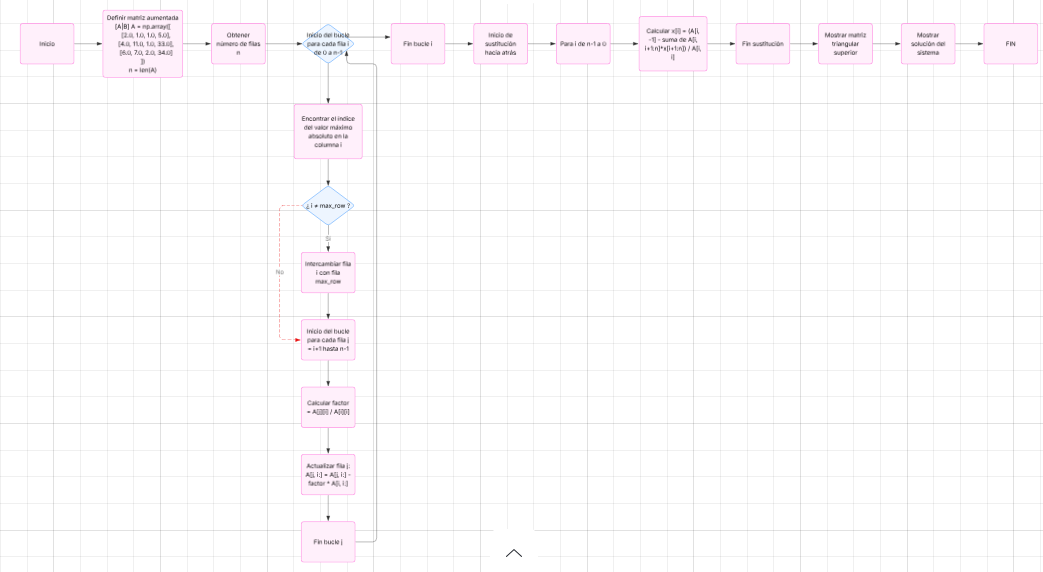

Enlace de diagrama:
https://lucid.app/lucidchart/d738590f-d835-449e-a376-c44bdeee7ffe/edit?viewport_loc=2800%2C684%2C1479%2C671%2C0_0&invitationId=inv_49acbad4-d554-46df-9482-fdeb9c638ce0